# Assignment for ASML: Unsupervised learning

**Introduction** 


This assignment contains 13 questions, totalling to 100 marks. Please write the answers to each question in the boxes following directly underneath each question (some of these are R Code boxes, and some of these R Markdown boxes, depending on the character of the questions). If you need to add text to a Code box, please use the commenting symbol (#) at the beginning of the line.

You can make use of any existing R functions (including those in packages, as far as available), or R functions developed in the lectures and labs, **unless stated otherwise**.

We consider a data set known  as  the "Old Faithful geyser data".  This is a data frame with 272 observations giving the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.
Please use the following code to read the data in and display a scatterplot: 


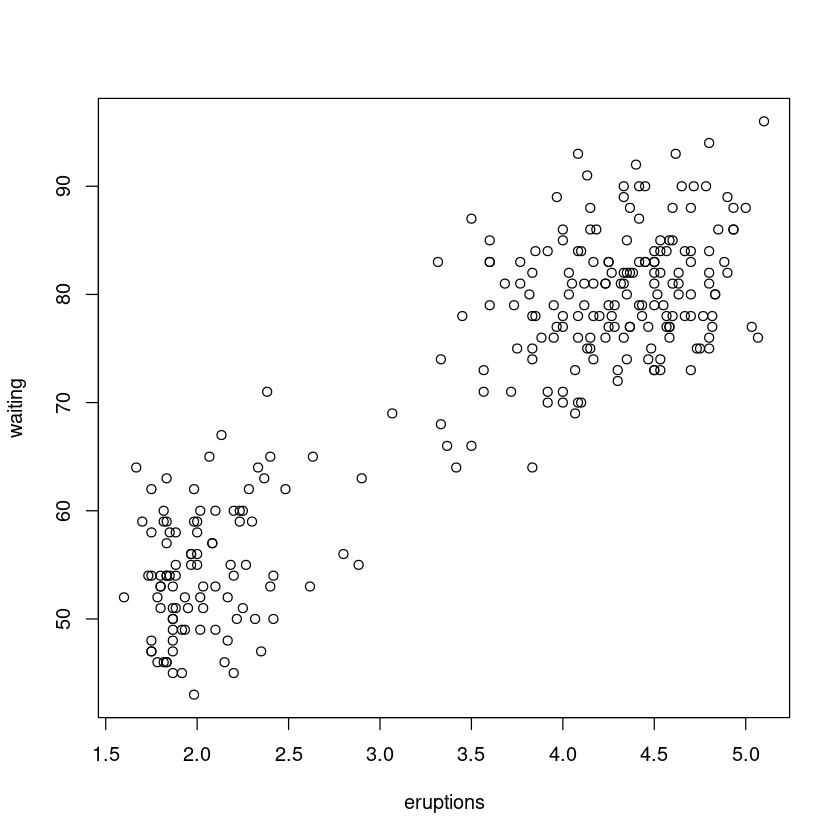

In [1]:
data(faithful)
plot(faithful)

 **Question 1** (6 marks)
 
 Compute the sample variance matrix as well as the correlation matrix of this data frame.

In [2]:
# YOUR CODE HERE
var(faithful)
cor(faithful)

,eruptions,waiting
eruptions,1.302728,13.97781
waiting,13.977808,184.82331


,eruptions,waiting
eruptions,1.0000000,0.9008112
waiting,0.9008112,1.0000000


**Question 2** (6 marks)

Interpret briefly the results from the previous question, with reference to the previously displayed scatterplot. 

Two features- eruptions and waiting-is shown tilted in the scatterplot, which suggests that they might be correlated. The correlation matrix has proven their correlation-0.9088, positively correlated, showing they are not independent.

**Question 3** (2 marks)

Produce a histogram of the variable `eruptions`.


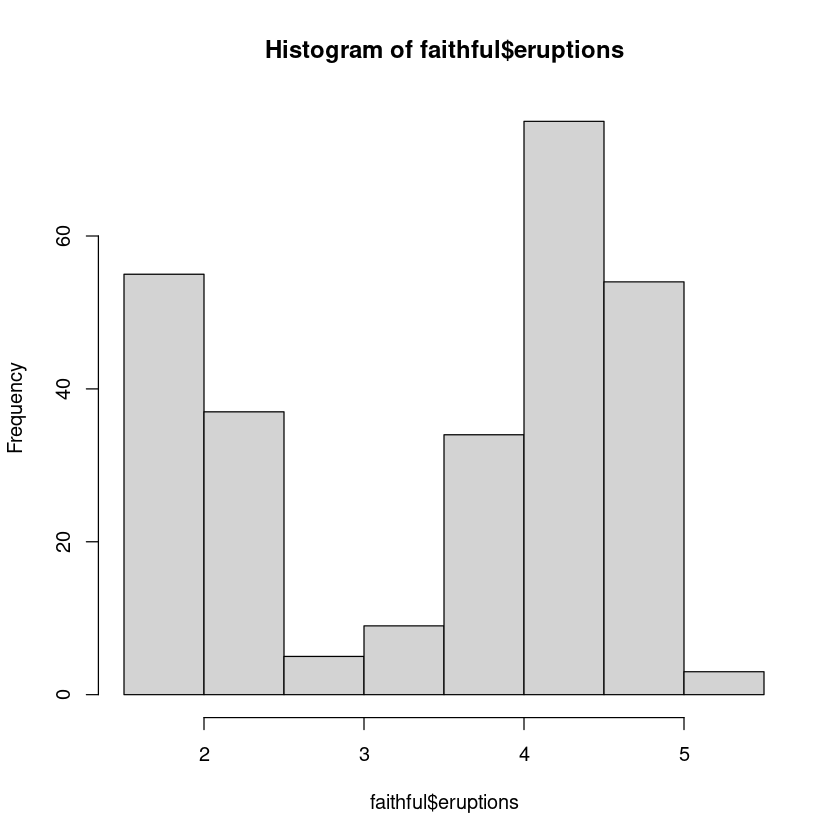

In [3]:
# YOUR CODE HERE
hist(faithful$eruptions)

**Question 4** (8 marks)

Now produce a histogram of the `waiting` variable, graphically overlaying a kernel density estimate of this variable.

In order to obtain the kernel density estimate, use R function `density` with its default options.


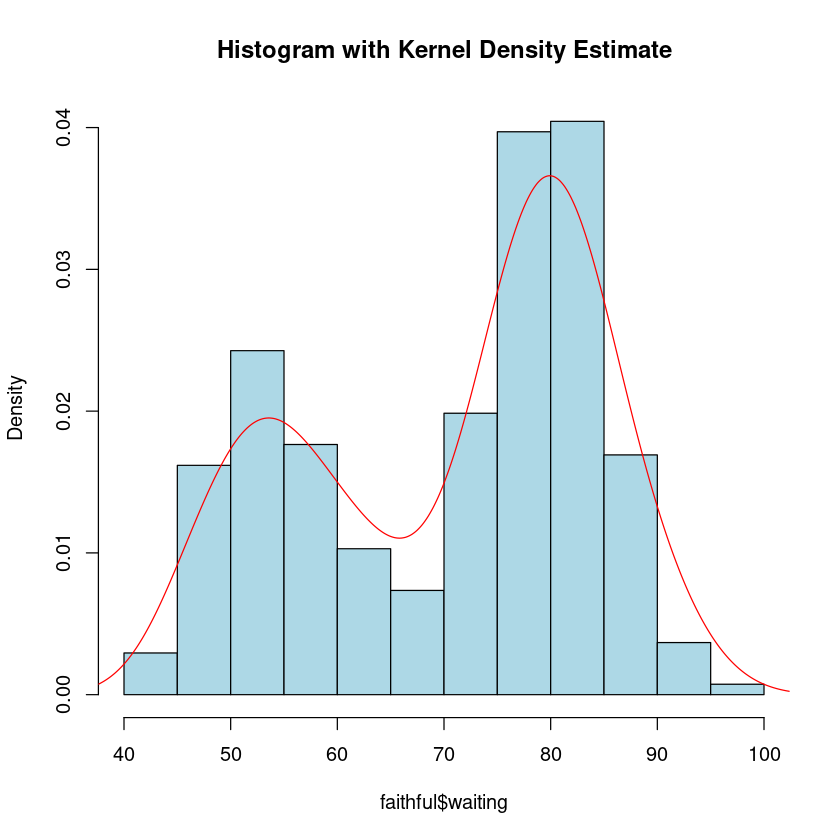

In [4]:
# YOUR CODE HERE
# hist(faithful$waiting)
# plot(density(faithful$waiting))
hist(faithful$waiting, probability = TRUE, col = "lightblue", main = "Histogram with Kernel Density Estimate")
lines(density(faithful$waiting), col = "red")

**Question 5** (8 marks)

Use function `kde` (with default options) from R package `ks` in order to estimate the density of the bivariate data frame `faithful`.  Visualize the estimated density through a perspective plot.


Loading required package: MASS



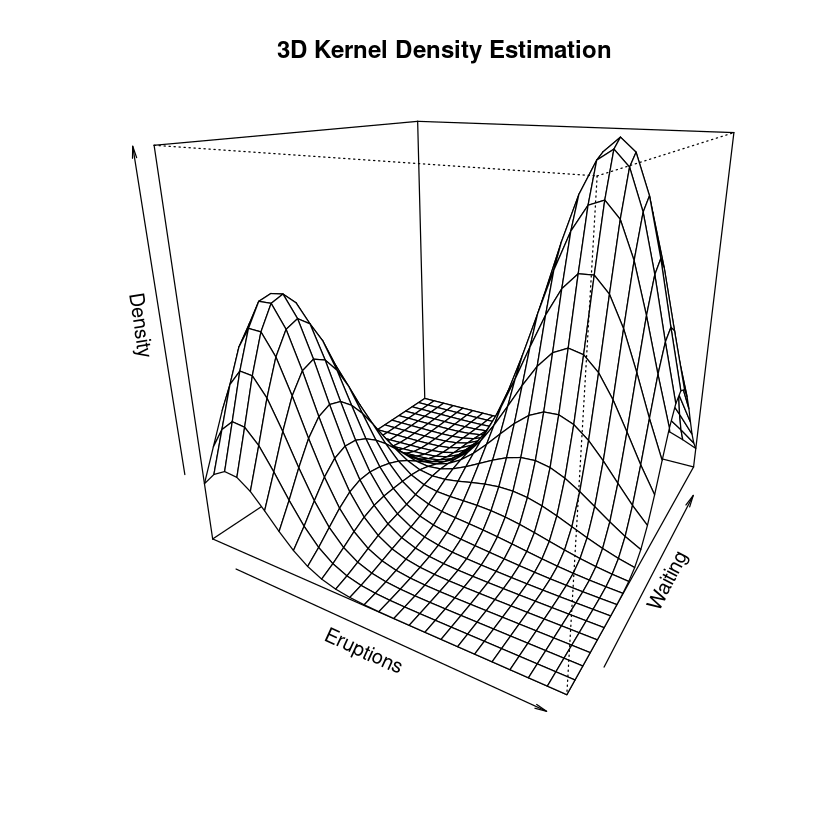

In [5]:
# YOUR CODE HERE
require(MASS)

faithful.kde <- kde2d(faithful$eruptions, faithful$waiting)

persp(faithful.kde$x, faithful.kde$y, faithful.kde$z, theta = 30, phi = 20,
      xlab = "Eruptions", ylab = "Waiting", zlab = "Density",
      main = "3D Kernel Density Estimation")


**Question 6** (12 marks)

Next we would like to implement a routine for automated bandwidth selection. 
For bivariate data (as in the Old Faithful data), it has been suggested in the literature to use the simple rule of thumb

$h_j= s_j n^{-1/6}$

where $s_j$ is the sample standard deviation of the j-th variable, and $n$ the sample size. Produce a function which implements this rule, and use it to compute the resulting bandwidths $h_1$  and $h_2$.   From this, produce a bandwidth matrix 

$H= \left(\begin{array}{cc} h_1^2 & 0\\ 0 & h_2^2 \end{array}\right)$,

and save it into an object `H`.


In [7]:
# YOUR CODE HERE

bandwidth_select <- function(x, y) {
  n <- length(x)
  h_x <- sd(x) * n^(-1/6)
  h_y <- sd(y) * n^(-1/6)
  
  return(c(h_x^2, 0, 0, h_y^2))
}

faithful_bandwidth <- bandwidth_select(faithful$eruptions, faithful$waiting)
H<- matrix(faithful_bandwidth, nrow = 2)

print("bandwidth matrix:")
print(H)




[1] "bandwidth matrix:"
          [,1]     [,2]
[1,] 0.2010624  0.00000
[2,] 0.0000000 28.52553


**Question 7** (10 marks)


Using the bandwidth matrix `H` in `kde`,  compute again the kernel density estimate of the `faithful` data.  Then produce two contourplots, with the first one showing the density estimate from Question 5, and the second one showing the density estimate from this question. Each plot should also display the original data points, and the axes of both plots should have the same ranges.



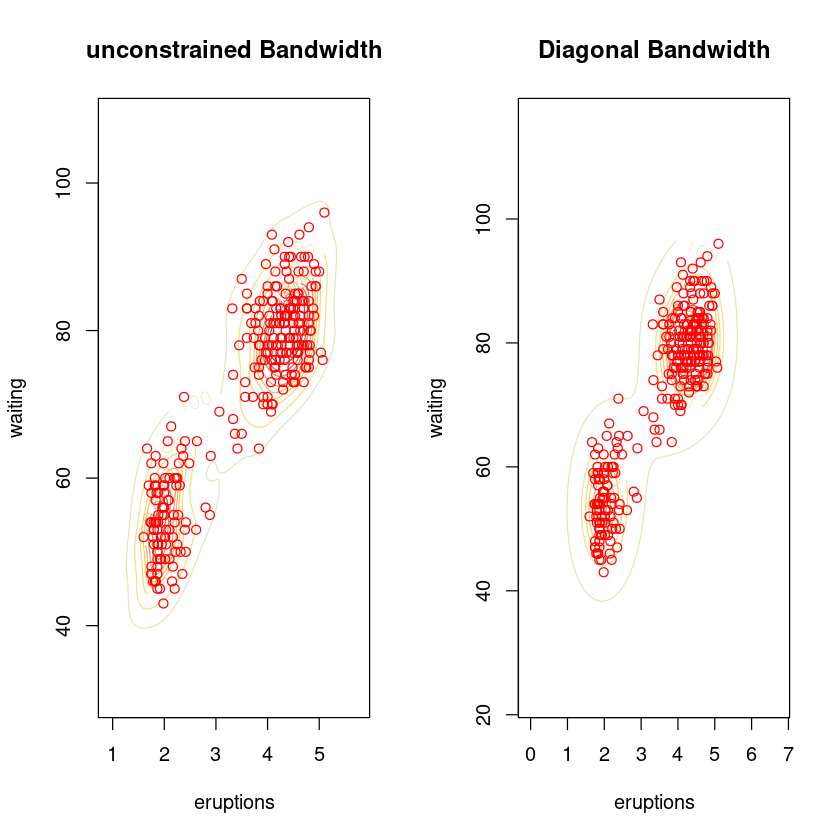

In [222]:
# YOUR CODE HERE
library(ks)

data(faithful)

faithful.kde <- kde(faithful)
faithful.kde2 <- kde(faithful, H=H)

require(ks)

par(mfcol = c(1,2))
plot(faithful.kde, cont=seq(10, 100, 10),xlab="eruptions", ylab="waiting", main = "unconstrained Bandwidth")
points(faithful$eruptions, faithful$waiting, col = "red")

plot(faithful.kde2, cont=seq(10, 100, 10),xlab="eruptions", ylab="waiting", main = "Diagonal Bandwidth")
points(faithful$eruptions, faithful$waiting, col = "red")




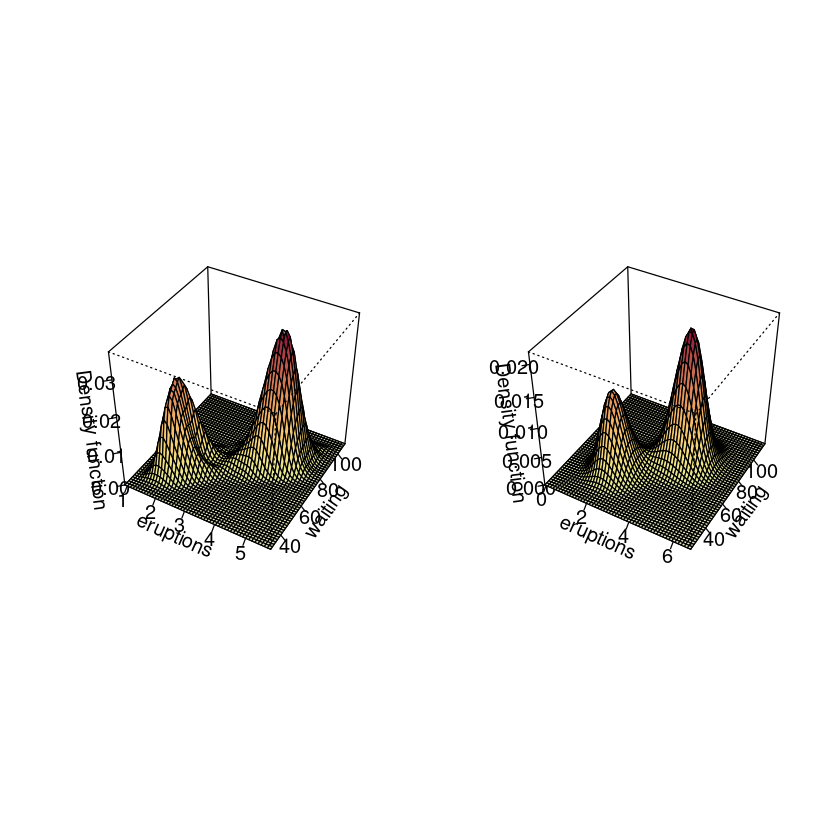

In [221]:
par(mfcol = c(1,2))
plot(faithful.kde,display="persp", theta=30)
plot(faithful.kde2,display="persp", theta=30)

**Question 8** (6 marks)

Describe briefly what you see in the two plots: In which aspects are the two estimated densities different? How would the plots differ if we were to use a non-diagonal bandwidth (that is, a bandwidth matrix for which the off-diagonal entries are non-zero)?

### Non-diagonal bandwidth vs. the diagonal matrix
In terms of the unconstrained bandwidth matrix, the contours seems to be stretched or rotated, potentially capturing correlations between the eruption and waiting times. This can account for anisotropic structures in the data, where the bandwidth varies across different directions.

In contrast, the diagonal matrix gives more circular tail contours and the data are more concentrated in the mode, ie, high density region. This causes the upper bump region and lower bump region fairly seperated from onw another, and thence creare a better appearance of a multimodal estimate. 

**Question 9** (12 marks)

Using again the bandwidths obtained in Question 6, compute and visualize a high-density region (HDR) 

$
{\cal L}(c)= \{ \boldsymbol{x} |\hat{f}(\boldsymbol{x})>c \}.
$

so that the integral

$\int_{ {\cal L}(c)}\hat{f}(\boldsymbol{x}) d \boldsymbol{x}$

is equal to 0.6. Your plot should also display the original data.



60% 
0.01364598

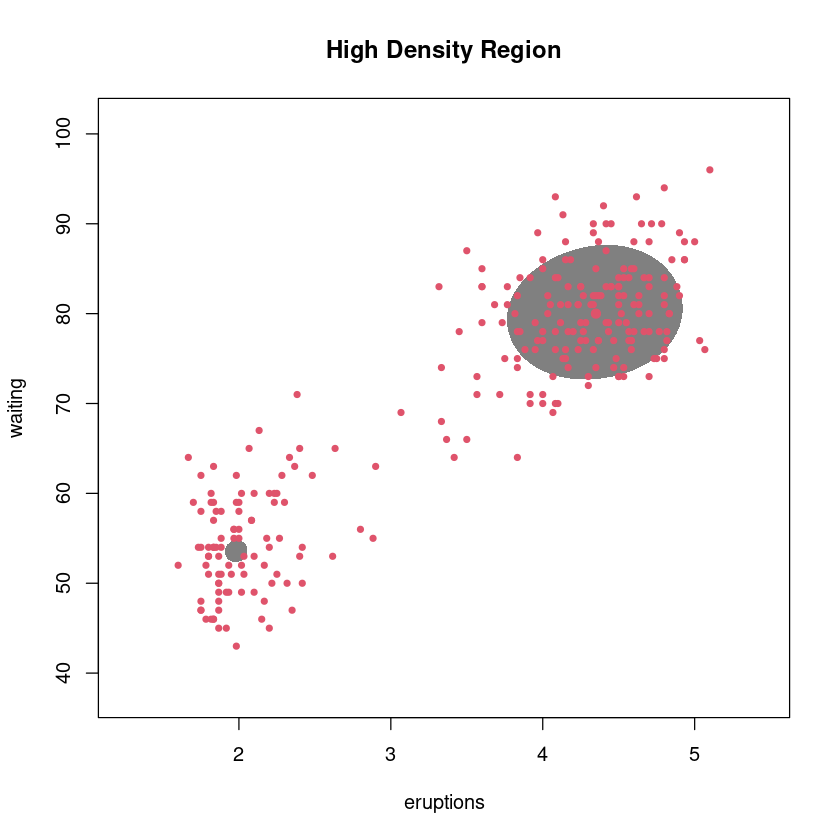

In [214]:
# YOUR CODE HERE
H<-faithful.kde2$H

require(hdrcde)
faithful.hdr <- hdr.2d(faithful$eruptions, faithful$waiting,  prob=0.6, kde.package="ks",h=c(0.201062413147119,28.52553)) 
faithful.hdr$falpha               #  cut-off constant c
plot(faithful.hdr, show.points=TRUE, pointcol=2, main="High Density Region",xlab="eruptions", ylab="waiting")

**Question 10** (7 marks)

Give a short critical assessment of the usefulness of the concept of high-density regions for clustering purposes.

YOUR ANSWER HERE

### Critical Assessment of HDR for clustering
The usefulness of high-density regions for clustering depends on the specific dataset and desired outcome. It offers several advantages like noise robustness and intuitive interpretation but suffers from limitations like parameter sensitivity and challenges with high dimensionality and overlapping clusters.


In terms of the practicality of HDR for clustering purpose, the benefits of HDR consist of data resilience, visual appeal,and shape flexibilit. First, the intuitive concept of dense regions translates well to easy visualization and interpretation of clusters. Second, unlike methods restricted to spherical clusters, it thrives on identifying clusters of diverse shapes and sizes. Lastly,it excels at isolating clusters amidst noisy data, ignoring outliers that confuse other methods.

However, HDR's effectiveness depends on appropriate parameter selection and careful consideration of computational complexities. Additionally, density-based methods may not perform well in datasets with irregular densities or varying densities within clusters.

In conclusion, while HDR offers valuable tools for clustering tasks under specific conditions, a comprehensive evaluation of data characteristics, analysis goals, and potential limitations is crucial for informed decision-making. Only through such a nuanced approach can one determine whether HDR serves as the most suitable method for a particular clustering endeavor.

**Question 11** (12 marks)

Using the function `mvnormalmixEM` from the R package `mixtools` fit a Gaussian mixture model to the data frame `faithful`.  Assign the outcome to an object `mixmodel`.  Choose an appropriate number of mixture components `k` based on previous observations.  Finally, show a scatter plot of the fitted model with density contours of your choosing.  (You can consult `?plot.mixEM` to learn about the plotting options.) Set a seed to ensure reproducible results.

number of iterations= 26 


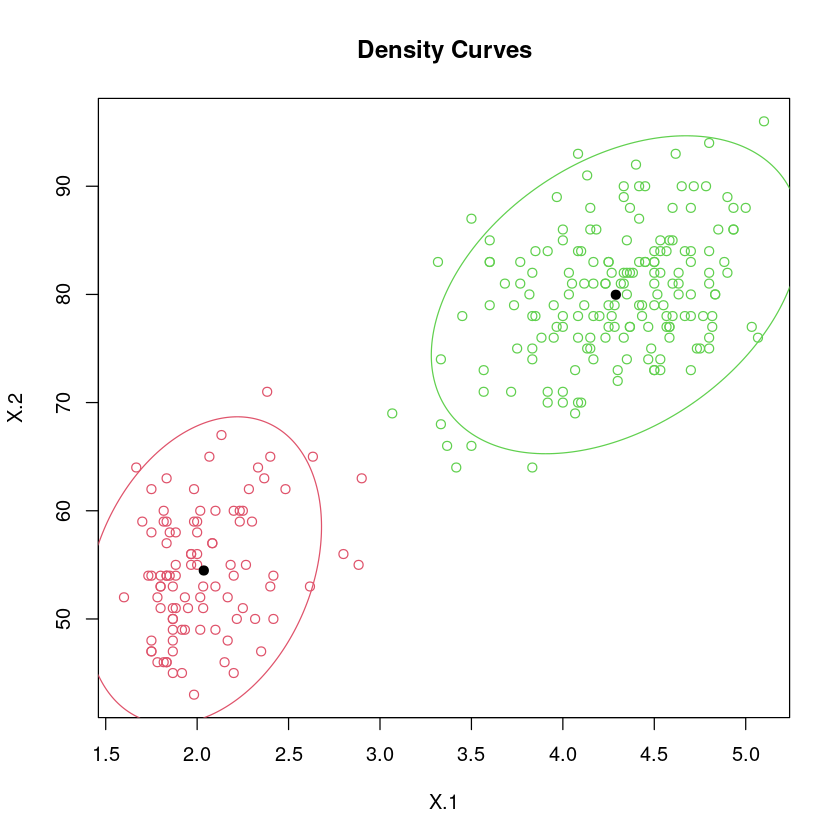

In [218]:
# YOUR CODE HERE
require(mixtools)
set.seed(123)
mixmodel<-mvnormalmixEM(faithful,k=2, verb=FALSE)
plot(mixmodel, density = TRUE, w = 1.1)

**Question 12** (3 marks)

Use the fitted mixture model to assign every data point of the data frame `faithful` to one of the `k` clusters. Print the number of class members for each of the `k` classes.

In [133]:
# YOUR CODE HERE
mixmodel.kcluster <- apply(mixmodel$posterior, 1, which.max)
table(mixmodel.kcluster)

mixmodel.kcluster
  1   2 
 97 175 

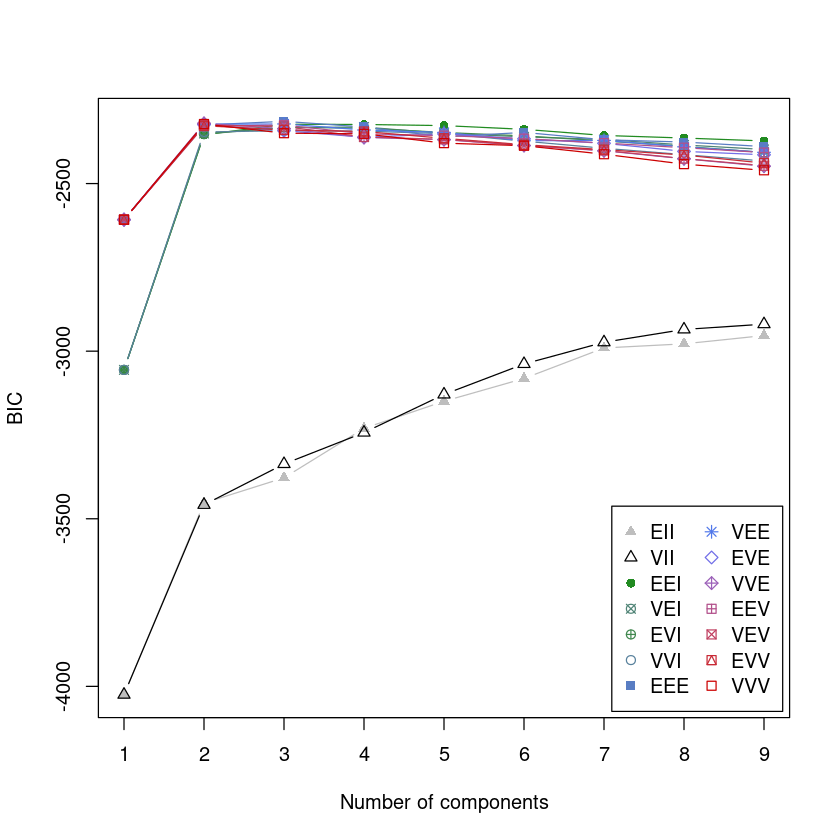

In [134]:
require(mclust) 
set.seed(105) 
faithful.fit <- Mclust(cbind(faithful$eruptions, faithful$waiting)) 
plot(faithful.fit, what="BIC")


**Question 13** (8 marks)

An important aspect of Gaussian mixture models is that it is a _generative model_ meaning we can use it to create new data by sampling from the model. Write an `R` function `sample_gmm` that takes arguments `size, prop, mus, sigmas` for the number of samples, the mixing probabilities, as well as the means vectors and covariance matrices. 

Return 100 new samples from the Gaussian mixture model and print them to a scatter plot. 

(Hint: you can sample from a multivariate Gaussian distribution using the function `rmvnorm` from the `mixtools` package.)

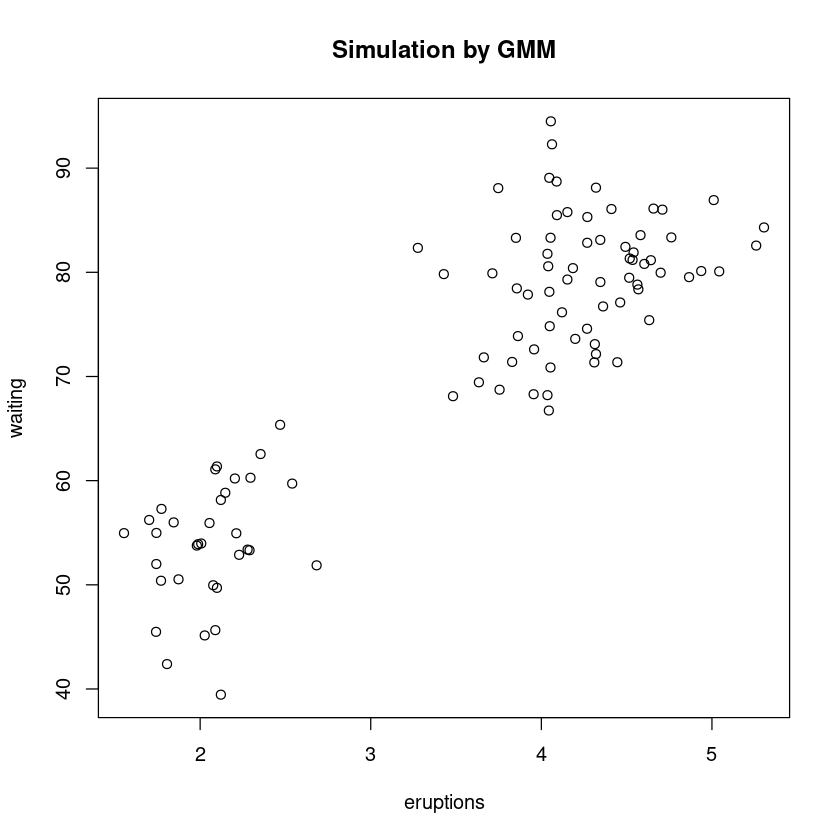

In [206]:
# YOUR CODE HERE

sample_gmm <- function(size, prop, mus, sigmas){
    
    prop <- unlist(prop)
    mu1 <- unlist(mus[1])
    mu2 <- unlist(mus[2])
    sigma1 <- matrix(unlist(sigmas[1]), nrow = 2)
    sigma2 <- matrix(unlist(sigmas[2]), nrow = 2)

    
    x <- runif(size)
    sim <- matrix(0, nrow = size, ncol = 2)
    cp <- cumsum(prop)
    for (i in 1:size){
        k <- 1 
        while (x[i] > cp[k]){
            k <- k + 1
        }
        if (k == 1)
            sim[i, ] <- rmvnorm(1, mu1, sigma1)
        else
            sim[i, ] <- rmvnorm(1, mu2, sigma2)
    } 
    return(sim)
}



save.sim <- sample_gmm(100, mixmodel$lambda, mixmodel$mu, mixmodel$sigma)

plot(save.sim[,1],save.sim[,2], density = TRUE,main="Simulation by GMM", xlab = "eruptions", ylab = "waiting")
